In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  

!pip install konlpy
from konlpy.tag import Kkma
tokenizer = Kkma()
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import *
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.5 MB/s 
     |████████████████████████████████| 453 kB 9.5 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
dir = "/content/gdrive/My Drive/Colab Notebooks/"

In [4]:
train = pd.read_csv(dir + "train_dataset6.csv", encoding = "utf-8-sig")
test = pd.read_csv(dir + "test_dataset6.csv", encoding = "utf-8-sig")
validation = pd.read_csv(dir + "val_dataset6.csv", encoding = "utf-8-sig")

In [5]:
print(train.isnull().values.any())
print(test.isnull().values.any())
print(validation.isnull().values.any())

False
False
False


In [6]:
train_data, test_data, validation_data = train, test, validation
print('훈련용 리뷰의 개수 :', len(train_data))
print('검증용 리뷰의 개수 :', len(validation_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 5875
검증용 리뷰의 개수 : 831
테스트용 리뷰의 개수 : 1688


In [7]:
print(train_data)

      Unnamed: 0                                                  X  y
0              0  비교할 수 없는 사랑이 비교할 수 없는 설렘 바로 그대 나에겐 그래요 뭐라고 말하려...  0
1              1  내 심장의 색깔은       시커멓게 타버려                틈만 나면 ...  0
2              2  적막한 이 밤의 소음어둠 속 저 문이 열려누가 막아 아무도      뜨거 뜨거 뜨거...  0
3              3  햇살이 좋았던 그 날 그만하자며 말을 하는 너 전혀 믿어지지가 않아 지금 이순간 모...  0
4              4  내 눈을 보고 말을 해봐요 그대가 무슨 생각을 하는지 난 궁금해요 알고 싶어요 나에...  0
...          ...                                                ... ..
5870        5870  하고 싶은 게 너무 많아서하날 고르기가너무 힘들었지하고 싶은 것들만 많을 뿐제대로 ...  0
5871        5871  예쁘네 오늘도 어제만큼 아니 오늘은 더 예뻐졌네 이런 말을 할 때마다 너는 못 들은...  1
5872        5872  어제는 어떤 날이었나 특별한 게 있었던가 떠올려 보려 하지만 별다를 건 없었던 것 ...  0
5873        5873  오늘 밤 바라본  저 달이 너무 처량해 너도 나처럼 외로워  텅 빈 가슴 안고 사는...  0
5874        5874  바보같이 아쉬움 많은 노래가 하늘에 닿기를 눈물 속에 밤새운 내 기도가 마음에 닿기...  1

[5875 rows x 3 columns]


In [9]:
train_data['tokenized'] = train_data['X'].apply(tokenizer.morphs)
test_data['tokenized'] = test_data['X'].apply(tokenizer.morphs)
validation_data['tokenized'] = validation_data['X'].apply(tokenizer.morphs)

In [10]:
print(train_data)

      Unnamed: 0                                                  X  y  \
0              0  비교할 수 없는 사랑이 비교할 수 없는 설렘 바로 그대 나에겐 그래요 뭐라고 말하려...  0   
1              1  내 심장의 색깔은       시커멓게 타버려                틈만 나면 ...  0   
2              2  적막한 이 밤의 소음어둠 속 저 문이 열려누가 막아 아무도      뜨거 뜨거 뜨거...  0   
3              3  햇살이 좋았던 그 날 그만하자며 말을 하는 너 전혀 믿어지지가 않아 지금 이순간 모...  0   
4              4  내 눈을 보고 말을 해봐요 그대가 무슨 생각을 하는지 난 궁금해요 알고 싶어요 나에...  0   
...          ...                                                ... ..   
5870        5870  하고 싶은 게 너무 많아서하날 고르기가너무 힘들었지하고 싶은 것들만 많을 뿐제대로 ...  0   
5871        5871  예쁘네 오늘도 어제만큼 아니 오늘은 더 예뻐졌네 이런 말을 할 때마다 너는 못 들은...  1   
5872        5872  어제는 어떤 날이었나 특별한 게 있었던가 떠올려 보려 하지만 별다를 건 없었던 것 ...  0   
5873        5873  오늘 밤 바라본  저 달이 너무 처량해 너도 나처럼 외로워  텅 빈 가슴 안고 사는...  0   
5874        5874  바보같이 아쉬움 많은 노래가 하늘에 닿기를 눈물 속에 밤새운 내 기도가 마음에 닿기...  1   

                                              tokenized  
0     [비교, 하, ㄹ, 수, 없, 는, 사랑, 이, 비교, 하, ㄹ, 수, 없, 는, .

In [11]:
X_train = train_data['tokenized'].values
y_train = train_data['y'].values
X_test= test_data['tokenized'].values
y_test = test_data['y'].values
X_val= validation_data['tokenized'].values
y_val = validation_data['y'].values

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [13]:
threshold = 1
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0
total_freq = 0 
rare_freq = 0 

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 16359
등장 빈도가 0번 이하인 희귀 단어의 수: 0
단어 집합에서 희귀 단어의 비율: 0.0
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.0


In [14]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 16361


In [15]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

In [16]:
print(X_train[:5])

[[1808, 5, 10, 35, 29, 4, 27, 6, 1808, 5, 10, 35, 29, 4, 482, 181, 419, 45, 7, 12, 242, 106, 1227, 168, 209, 95, 217, 5, 53, 207, 245, 1032, 3, 1228, 5, 3, 739, 186, 9, 35, 126, 37, 896, 19, 5, 3, 119, 13, 7, 30, 24, 735, 45, 6, 302, 94, 63, 45, 4, 75, 219, 1145, 83, 23, 3, 479, 320, 129, 62, 10, 389, 5, 19, 5, 2, 373, 62, 10, 337, 2000, 849, 10, 20, 49, 13, 544, 6, 25, 9, 20, 49, 8, 322, 210, 3, 14, 8, 123, 2, 45, 4, 75, 1064, 1145, 37, 922, 19, 268, 3, 92, 28, 79, 3, 37, 2445, 5, 19, 268, 17, 78, 94, 577, 30, 26, 18, 19, 360, 8, 32, 2, 28, 79, 3, 735, 6, 10, 35, 29, 468, 1808, 5, 10, 35, 29, 4, 445, 6, 1808, 5, 10, 35, 29, 4, 96, 45, 7, 21, 298, 4, 632, 1185, 298, 4, 20, 9, 174, 699, 174, 1319, 513, 21, 307, 2, 23, 87, 226, 2, 929, 4, 45, 125, 1060, 527, 2, 290, 386, 12, 2046, 3, 45, 6, 302, 94, 63, 45, 4, 75, 219, 1145, 83, 23, 3, 479, 320, 129, 62, 10, 389, 5, 19, 5, 2, 373, 62, 10, 337, 2000, 849, 10, 20, 49, 13, 544, 6, 25, 9, 20, 49, 8, 322, 210, 3, 14, 8, 123, 2, 16, 2, 45, 4, 

In [17]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [18]:
max_len = 700
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 700 이하인 샘플의 비율: 98.96170212765958


In [19]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)
X_val = pad_sequences(X_val, maxlen = max_len)

In [20]:
y_tr = np.empty((len(y_train),2))
for i in range(len(y_train)):
    if y_train[i] == 0:
      y_tr[i] = [1, 0]
    else:
      y_tr[i] = [0, 1]

In [21]:
y_te = np.empty((len(y_test),2))
for i in range(len(y_test)):
    if y_test[i] == 0:
      y_te[i] = [1, 0]
    else:
      y_te[i] = [0, 1]

In [22]:
y_va = np.empty((len(y_val),2))
for i in range(len(y_val)):
    if y_val[i] == 0:
      y_va[i] = [1, 0]
    else:
      y_va[i] = [0, 1]

In [23]:
print(y_tr)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [24]:
print(y_te)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [25]:
print(y_va)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [27]:
from tensorflow.keras.layers import Embedding, Dense, LSTM,  Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

embedding_dim = 100
hidden_units = 50

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units)))
model.add(Dense(2, activation='softmax'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)
history = model.fit(X_train, y_tr, epochs = 20, callbacks = es, batch_size = 70, validation_data=(X_val, y_va))

Epoch 1/20
84/84 [==============================] - 111s 1s/step - loss: 0.5854 - accuracy: 0.7166 - val_loss: 0.5065 - val_accuracy: 0.7449
Epoch 2/20
84/84 [==============================] - 96s 1s/step - loss: 0.4866 - accuracy: 0.8010 - val_loss: 0.4963 - val_accuracy: 0.7690
Epoch 3/20
84/84 [==============================] - 96s 1s/step - loss: 0.3701 - accuracy: 0.8555 - val_loss: 0.4568 - val_accuracy: 0.7954
Epoch 4/20
84/84 [==============================] - 96s 1s/step - loss: 0.2847 - accuracy: 0.8963 - val_loss: 0.4411 - val_accuracy: 0.8087
Epoch 5/20
84/84 [==============================] - 99s 1s/step - loss: 0.2435 - accuracy: 0.9159 - val_loss: 0.4400 - val_accuracy: 0.8279
Epoch 6/20
84/84 [==============================] - 96s 1s/step - loss: 0.2362 - accuracy: 0.9132 - val_loss: 0.4833 - val_accuracy: 0.8255
Epoch 7/20
84/84 [==============================] - 97s 1s/step - loss: 0.1890 - accuracy: 0.9367 - val_loss: 0.4791 - val_accuracy: 0.8243
Epoch 8/20
84/84 [=

In [28]:
 model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         1636100   
                                                                 
 bidirectional (Bidirectiona  (None, 100)              60400     
 l)                                                              
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 1,696,702
Trainable params: 1,696,702
Non-trainable params: 0
_________________________________________________________________


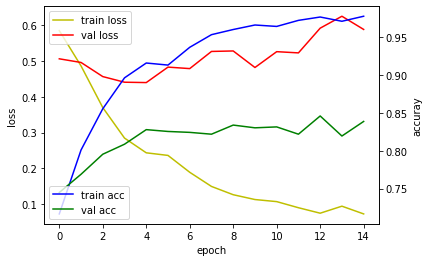

In [29]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [30]:
score = model.evaluate(X_test, y_te)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

53/53 [==============================] - 7s 141ms/step - loss: 0.6262 - accuracy: 0.8400
test_loss:  0.6261870861053467
test_acc:  0.8400474190711975


In [31]:
y_pred = model.predict(X_test)

In [32]:
 print(y_pred)

[[4.3594856e-03 9.9564052e-01]
 [3.3769526e-03 9.9662304e-01]
 [9.9999857e-01 1.4001209e-06]
 ...
 [9.9973434e-01 2.6560659e-04]
 [9.9999869e-01 1.3276602e-06]
 [9.9947387e-01 5.2620919e-04]]


In [33]:
y_class = y_pred.argmax(axis=-1)
y_class

array([1, 1, 0, ..., 0, 0, 0])

In [34]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix, plot_confusion_matrix, f1_score
arr = confusion_matrix(y_test, y_class)
print(arr)

[[1076  128]
 [ 142  342]]


In [35]:
precision = precision_score(y_test, y_class, average= "weighted")
print(precision)

0.8387555793546204


In [36]:
precision = precision_score(y_test, y_class, average= "macro")
print(precision)

0.8055375048038291


In [37]:
recall = recall_score(y_test, y_class, average= "weighted")
print(recall)

0.840047393364929


In [38]:
recall = recall_score(y_test, y_class, average= "macro")
print(recall)

0.8001496389445649


In [39]:
f1score = f1_score(y_test, y_class, average= "weighted")
print(f1score)

0.8393360276927357


In [40]:
f1score = f1_score(y_test, y_class, average= "macro")
print(f1score)

0.8027515074085039


In [41]:
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import matplotlib.cm

label=['negative', 'positive']
df_cm = DataFrame(arr, index = [i for i in label], columns = [i for i in label])
df_cm

,negative,positive
negative,1076,128
positive,142,342


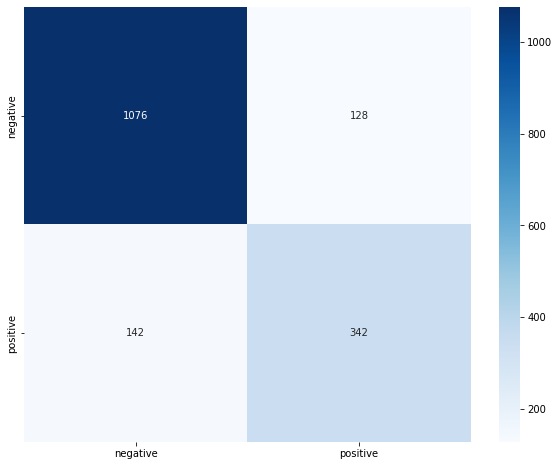

In [42]:
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.heatmap(df_cm, cmap='Blues',  xticklabels=label, yticklabels=label, annot = True, fmt='d')

**새로운 가사 데이터를 활용한 분류 결과**

In [53]:
test_new = pd.read_csv(dir + "test_data.csv", encoding = "utf-8-sig")

In [54]:
print(test_new)

                제목                                                 가사   감정
0        (bonus)힙합  우리 음악이 힙합인 건\n다들 아는 사실이지만\n재주 섞인 멜로디는 다림질일까\n꺼...   분노
1              팡파레  코끝을 간지럽히는 살랑 부는 바람이 눈 감으면 어디든 네 곁에 데려가 주길 어느새 ...   행복
2  안개비 (Feat. 조형근)  안개비가 내리네\n소리없이 내리네\n우산 없이 걸어도\n아무렇지 않겠지\n안개비 속...   슬픔
3              고양이  다시와 말해 줄래요  매일 울음이 멈추지않아요  매일 지나가는 사람들  너무 낯설기...  두려움


In [55]:
import re
from konlpy.tag import Kkma
kkma = Kkma()

def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = kkma.morphs(new_sentence) # 토큰화
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  y_pred = model.predict(pad_new) # 감정 분류
  result = y_pred.argmax()
  emo_result = ''
  if result == 0:
    emoresult = "부정"
  else:
    emoresult = "긍정"
  print("분류결과: ", emoresult)

In [56]:
for i in range(len(test_new)):
  print(test_new['제목'][i], ":" )
  print('실제 감정: ', test_new['감정'][i])
  sentiment_predict(test_new['가사'][i])

(bonus)힙합 :
실제 감정:  분노
분류결과:  부정
팡파레 :
실제 감정:  행복
분류결과:  긍정
안개비 (Feat. 조형근) :
실제 감정:  슬픔
분류결과:  부정
고양이 :
실제 감정:  두려움
분류결과:  부정
